In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import log_loss
import copy

### Assignment 3 - ANN 
#### Student: Andrea Gomez 

Q1: Multi-Layer Perceptron for Classification Dataset: You will use the
UCI Optical Recognition of Handwritten Digits Dataset:
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

You should get this data set using Scikit-Learn (by using sklearn.datasets.load_digits):
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

### General requirements:
Multi-Layer Perceptron classifier with a single hidden layer for performing both binary and multi-class classification. The model implements the *backpropagation* algorithm. To optimize the process of updating the weight matrices, it uses the *Stochastic Gradient Descent (SGD) algorithm*.

You can use **sklearn.neural_network.MLPClassifier** as long as all the functionality required in the problem description exists.

### Functions for extra credit:

1. Implement the following function that creates a weight matrix and initializes it with small random real numbers. [4 pts]

Sklearm uses 'Xavier initialization' to initialize the weight matrix. 'Xavier initialization' sets a layer’s weights to values chosen from a random uniform distribution that’s bounded between

$\pm \sqrt{\frac{6}{n_i + n_{i+1}}} $

where $n_i$ is the number of incoming network connections, or “fan-in,” to the layer, and $n_{i+1}$ is the number of outgoing network connections from that layer, also known as the “fan-out.”

In [2]:
#  initializeTheta(in, out):
#
#    Arguments:
#    -----------
#      in : int number of input neurons/features.
#      out : int number of output neurons/features.
#      
#    Returns:
#    -----------
#      Theta : ndarray The weight matrix initialized by small random numbers.
np.random.seed(42)

def initializeTheta(inputs, outputs):

    # Generate weights
    coef_init = np.random.uniform(-1, 1, (inputs, outputs))* np.sqrt(6 / (inputs + outputs))

    return coef_init


2. Implement the logistic sigmoid activation function. [2 pts]

In [3]:
# logistic(z)
#
#    Arguments:
#    -----------
#      z : ndarray
#      
#    Returns:
#    -----------
#      An ndarray containing the logistic sigmoid values of the input.

def logistic(z):
    return (1 / (1 + exp(-z)))

3. Implement the ReLU (rectified linear unit) activation function. [3 pts]

In [4]:
# relu(z)
#
#    Arguments:
#    -----------
#      z : ndarray
#      
#    Returns:
#    -----------
#      An ndarray containing the relu output values of the input.

def relu(z):
    return max(0, x)

4. Implement the tanh (hyperbolic tangent) activation function. [3 pts]

In [5]:
# tanh(z)
#
#    Arguments:
#    -----------
#      z : ndarray
#      
#    Returns:
#    -----------
#      An ndarray containing the tanh output values of the input.

def tanh(z):
    return np.tanh(z)

### Multi-Class Classification using MLPClassifier from sklearn

6. Read the handwritten digits dataset using the sklearn.datasets.load_digits function for performing multi-class classification.

In [6]:
data = load_digits()
X = data.data

target = data.target.reshape(-1,1)
y = target

In [7]:
df = pd.DataFrame(data=X, columns = data.feature_names)
df['target'] = y

In [8]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


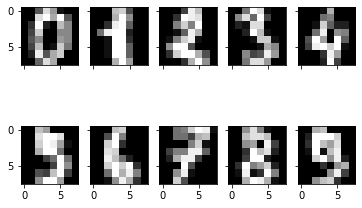

In [9]:
#plt.imshow(data.data[0].reshape(8,8), cmap='gray')

fig, axs = plt.subplots(2, 5)
axs[0, 0].imshow(data.data[0].reshape(8,8), cmap='gray')
axs[0, 1].imshow(data.data[1].reshape(8,8), cmap='gray')
axs[0, 2].imshow(data.data[2].reshape(8,8), cmap='gray')
axs[0, 3].imshow(data.data[3].reshape(8,8), cmap='gray')
axs[0, 4].imshow(data.data[4].reshape(8,8), cmap='gray')
axs[1, 0].imshow(data.data[5].reshape(8,8), cmap='gray')
axs[1, 1].imshow(data.data[6].reshape(8,8), cmap='gray')
axs[1, 2].imshow(data.data[7].reshape(8,8), cmap='gray')
axs[1, 3].imshow(data.data[8].reshape(8,8), cmap='gray')
axs[1, 4].imshow(data.data[9].reshape(8,8), cmap='gray')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

7. Standardize the features. [1 pts]
8. Partition the data into train and test set. [2 pts]


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.20, stratify=y, random_state=42)

# Standardize the data
scaler = StandardScaler()  

# fit only on the training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# apply same transformation to test data
X_test = scaler.transform(X_test)

9. You don’t need to report hyperparameter tuning. Note that unlike previous assignments, hyperparameter tuning is time-consuming for the MLP model. You may want to perform an educated tuning of the hyperparameters.

You need to report the optimal values of the hyperparameters that you used for training. For hyperparameter tuning, the following parameters should have following fixed setting. [16 pts]

- regularizer=“l2”
- verbose=True
- early_stopping=True
- validation_fraction=0.1

Find the optimal values for the following hyperparameters.

- hidden_layer_neurons
- activation
- alpha
- learning_rate
- learning_rate_init
- max_iter
- tol n_iter_no_change


In [ ]:
param_grid = {'hidden_layer_sizes': [(3,), (5,), (10,)], 
              'activation': ['logistic', 'relu','tanh'],
              'alpha': (1, 0.1, 0.01, 0.001),
              'learning_rate': ['adaptive', 'constant'], 
              'learning_rate_init' : [0.1, 0.01, 0.001],
              'max_iter':[100, 200, 300],
              'tol': [0.001, 0.0001],
              'n_iter_no_change':[5, 10]
              }

clf_mlp = MLPClassifier(solver='sgd', early_stopping=True, 
                        random_state=42)

clf_mlp_cv = GridSearchCV(clf_mlp, param_grid, scoring='accuracy', 
                          cv=5, verbose=1, n_jobs=-1)
clf_mlp_cv.fit(X_train, y_train.ravel())


params_optimal_mlp = clf_mlp_cv.best_params_

print("Best Score (accuracy): %f" % clf_mlp_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_mlp)
print("\n")

I used GridSearchCV from sklearn for hyperparameter tuning. I will leave the cell commented. After hyperparameter tuning, these were the optimal parameters obtained:

    - hidden_layer_sizes=(10, )
    - activation='relu',
    - alpha=1
    - learning_rate='adaptive',
    - learning_rate_init=0.1
    - max_iter=100
    - tol=0.001
    - n_iter_no_change=5

I'm using **warm_start = True** with **max_iter = 1** to do he computations needed in every epoch. With this configuration the model does *max_iter* iterations at the time, in this case 1. The model stores the updated parameters and uses them as the inital parameters the next time the *model.fit()* is called.

For some reason using this setting with **learning_rate = adaptive** the learning rate update was not being carried in the next iteration/epoch. I update the learning rate manually just like is done by MLPClassifier by sklearn. Every time validation score doesn't improve by **tol** for **n_iter_no_change** the learning rate is divided by 5. Just like the sklearn MLPClassifier with *early_stopping=True* and *learning_rate=adaptive* the model stops training when the learning rate is too small and change has not been see by *n_iter_no_change* epochs.

In [11]:
# Training the model using the optimal parameters
mlp3 = MLPClassifier(hidden_layer_sizes=(10, ), activation='relu',
                        solver='sgd', alpha=1, learning_rate='adaptive',
                        max_iter=1, warm_start=True, learning_rate_init=0.1,
                        tol=0.001, verbose=True, early_stopping=True,
                        n_iter_no_change=5, random_state=42)


In [12]:
# mlp3 parameters
max_iter=100
early_stopping = True

# labels of classes 
labels = np.unique(y_train)

# stores weigths matrix
coef = []
# stores eta for every epoch
eta_list = []
# stores validation loss for every epoch
validation_loss = []

# split the train set into val and train set - used to calculate validation loss 
if early_stopping:
    X_traines, X_val, y_traines, y_val = train_test_split(X_train, y_train, test_size=0.10, 
                                                          random_state=42, stratify=y_train)
# number samples in training set
n_samples = X_train.shape[0]

# initializations for learning rate computation
best_val_score = -np.inf
no_improv_count = 0
param = {}

# each iteration is an epoch
for i in range(max_iter): 
    
    if i > 0:
        # compute probabilites on validation set before updating coefs_    
        prob_val = mlp3.predict_proba(X_val)
        
    # fit the model one iteration 
    mlp3.fit(X_train, y_train.ravel())
    
    # get the learning rate value from model 
    eta = mlp3.get_params()['learning_rate_init']
    eta_list.append(eta)

    # Compute probability for first iteration 
    # Find initial values of weigths before updating coeficients after 1st epoch
    # GOAL: find the initial coef and calculate prob with those coeficients for the 
    #       first iteration
    if i == 0:
        
        # size of coeficient matrix 
        coef_0m, coef_0n = mlp3.coefs_[0].shape
        coef_1m, coef_1n = mlp3.coefs_[1].shape
        
        # compute an aproximation to the initial coeficients generated by sklearn 
        coef_0 = initializeTheta(coef_0m, coef_0n)     
        coef_1 = initializeTheta(coef_1m, coef_1n)
        coef = [coef_0, coef_1]
        
        # store actual coeficients of model 
        temp = copy.deepcopy(mlp3.coefs_)
        # asign initial coeficients to the model
        mlp3.coefs_ = coef
        # compute probabilities with initial coeficients
        prob_val = mlp3.predict_proba(X_val)
        # reasign the update coeficients to the model 
        mlp3.coefs_ = temp
      
    # compute validation loss
    val_loss = log_loss(y_val, prob_val, labels=labels)
    
    values = 0
    # Add L2 regularization term to validation loss 
    for s in coef:
        s = s.ravel()
        values += np.dot(s, s)    
    val_loss += (0.5 * mlp3.alpha) * values / X_val.shape[0]
    
    validation_loss.append(val_loss)  
    
    # store coeficients to compute regularization term in 
    # next iteration with the coeficients before they are updated.
    coef = copy.deepcopy(mlp3.coefs_)
    
    ###################### print report #########################
    
    #print('Epoch {:2} of {}:  Training loss = {:.4f} | Validation Loss = {:.4f} | Validation Score = {:.4f} | Eta = {:.6f}'.
    #     format(i+1, max_iter, mlp3.loss_, validation_loss[i], mlp3.validation_scores_[i], eta_list[i]))

    
    ################# Learning rate update ######################
    
    last_val_score = mlp3.validation_scores_[-1]
    tol = mlp3.get_params()['tol']
    n_iter_nochange = mlp3.get_params()['n_iter_no_change']
    
    # check for improvement 
    if last_val_score < (best_val_score + tol):  #if val score doesn't improve
        no_improv_count += 1
    else:
        no_improv_count = 0
        
    # update best validation score 
    if  last_val_score > best_val_score:
        best_val_score = last_val_score
        
    # update learning rate or stop
    if no_improv_count > n_iter_nochange:
        
        if eta <= 1e-6:
            print("\nEarly stopping because the validation score change between two"+ 
                  " consecutive epochs is less than", tol, "over the last",
                  n_iter_nochange, "epochs")
            break
        
        # compute new eta
        new_eta = eta/5
        # update learning rate in the model
        param['learning_rate_init'] = new_eta
        mlp3.set_params(**param)
        # reset number of no improvement counter
        no_improv_count = 0


Iteration 1, loss = 2.30007602
Validation score: 0.527778
Iteration 2, loss = 1.34517396
Validation score: 0.819444
Iteration 3, loss = 0.88954887
Validation score: 0.881944
Iteration 4, loss = 0.65401920
Validation score: 0.895833
Iteration 5, loss = 0.53048382
Validation score: 0.916667
Iteration 6, loss = 0.45639025
Validation score: 0.937500
Iteration 7, loss = 0.40591691
Validation score: 0.951389
Iteration 8, loss = 0.36945986
Validation score: 0.951389
Iteration 9, loss = 0.34558755
Validation score: 0.958333
Iteration 10, loss = 0.32681969
Validation score: 0.958333
Iteration 11, loss = 0.31262539
Validation score: 0.958333
Iteration 12, loss = 0.30127098
Validation score: 0.958333
Iteration 13, loss = 0.29189624
Validation score: 0.958333
Iteration 14, loss = 0.28389940
Validation score: 0.958333
Iteration 15, loss = 0.27715533
Validation score: 0.958333
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Setting learning rate to 0.020000
Iteratio

C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(



Validation score: 0.951389
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Setting learning rate to 0.000800
Iteration 28, loss = 0.26213902
Validation score: 0.951389
Iteration 29, loss = 0.26210278
Validation score: 0.951389
Iteration 30, loss = 0.26206655
Validation score: 0.951389
Iteration 31, loss = 0.26203041
Validation score: 0.951389
Iteration 32, loss = 0.26199444
Validation score: 0.951389
Iteration 33, loss = 0.26195841
Validation score: 0.951389
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Setting learning rate to 0.000160
Iteration 34, loss = 0.26191080
Validation score: 0.951389
Iteration 35, loss = 0.26190358
Validation score: 0.951389
Iteration 36, loss = 0.26189638
Validation score: 0.951389
Iteration 37, loss = 0.26188920
Validation score: 0.951389
Iteration 38, loss = 0.26188202
Validation score: 0.951389
Iteration 39, loss = 0.26187485
Validation score: 0.951389
Validation score did not improve

10. Your jupyter notebook should display the following items. You will not get any credit if your jupyter notebook doesn’t have these items displayed during your submission. Additionally, submit a PDF file containing the following items. [2 + 6 + 10 + 10 = 28 pts]

    a) Epoch number, Training loss, validation loss, validation score, and step size (eta). This should be displayed as a single row, as follows. There should be max_iter number of rows, one for each epoch.
    
    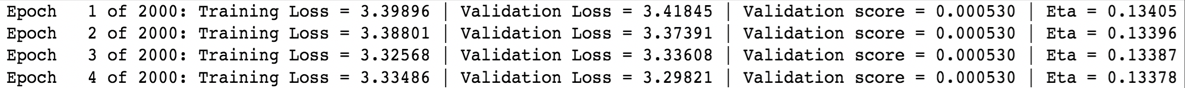
    
    If the program terminates early, then it should display the following message:
        Early stopping because the validation score change between two consecutive epochs is less than (value of “tol”) over the last (value of “n_iter_no_change”) epochs.


**NOTE**: I wasn't sure if I was supposed to show this while the model was running of afterwards. This can also be shown while the model is training, I left it as a comment in the section print report. It looks kind of messy while haveing *verbose=True* by the model so I decided to store the values that I manually computed in arrays and show everything here.

In [13]:
best_val_score = -np.inf
no_improv_count = 0

for i in range(mlp3.n_iter_):
    print('Epoch {:2} of {}:  Training loss = {:.4f} | Validation Loss = {:.4f} | Validation Score = {:.4f} | Eta = {:.6f}'.
         format(i+1, max_iter, mlp3.loss_curve_[i], validation_loss[i], mlp3.validation_scores_[i], eta_list[i]))
    
    last_val_score = mlp3.validation_scores_[i]
    tol = mlp3.get_params()['tol']
    n_iter_nochange = mlp3.get_params()['n_iter_no_change']
    
    # check for improvement 
    if last_val_score < (best_val_score + tol):  #if val score doesn't improve
        no_improv_count += 1
    else:
        no_improv_count = 0
        
    # update best validation score 
    if  last_val_score > best_val_score:
        best_val_score = last_val_score
    
    # reset counter if eta gets a new value
    if eta_list[i] != eta_list[i-1]:
        no_improv_count = 0
        
    # update learning rate or stop
    if no_improv_count >= n_iter_nochange:
        if eta_list[i] <= 1e-6:
            print("Early stopping because the validation score change between two"+ 
                  " consecutive epochs is less than", tol, "over the last",
                  n_iter_nochange, "epochs")
    

Epoch  1 of 100:  Training loss = 2.3001 | Validation Loss = 3.1996 | Validation Score = 0.5278 | Eta = 0.100000
Epoch  2 of 100:  Training loss = 1.3452 | Validation Loss = 1.5012 | Validation Score = 0.8194 | Eta = 0.100000
Epoch  3 of 100:  Training loss = 0.8895 | Validation Loss = 0.9835 | Validation Score = 0.8819 | Eta = 0.100000
Epoch  4 of 100:  Training loss = 0.6540 | Validation Loss = 0.7071 | Validation Score = 0.8958 | Eta = 0.100000
Epoch  5 of 100:  Training loss = 0.5305 | Validation Loss = 0.5755 | Validation Score = 0.9167 | Eta = 0.100000
Epoch  6 of 100:  Training loss = 0.4564 | Validation Loss = 0.4964 | Validation Score = 0.9375 | Eta = 0.100000
Epoch  7 of 100:  Training loss = 0.4059 | Validation Loss = 0.4418 | Validation Score = 0.9514 | Eta = 0.100000
Epoch  8 of 100:  Training loss = 0.3695 | Validation Loss = 0.3964 | Validation Score = 0.9514 | Eta = 0.100000
Epoch  9 of 100:  Training loss = 0.3456 | Validation Loss = 0.3723 | Validation Score = 0.9583 


    b) Two graphs:
    - First graph plots both training loss and validation loss against epochs.
    - Second graph plots validation score vs epochs.


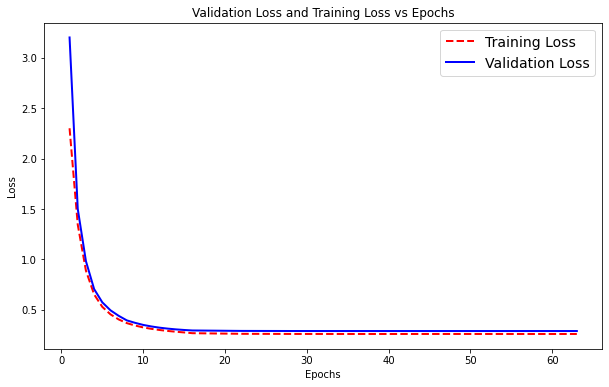

In [14]:
epochs = range(1, mlp3.n_iter_ + 1)

plt.figure(figsize=(10, 6))   
plt.plot(epochs, mlp3.loss_curve_, "r--", alpha=1.0, linewidth=2.0, label="Training Loss")
plt.plot(epochs, validation_loss, "b-", alpha=1.0, linewidth=2.0, label="Validation Loss")

plt.legend(loc="best", fontsize=14) 
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss and Training Loss vs Epochs")
plt.show()


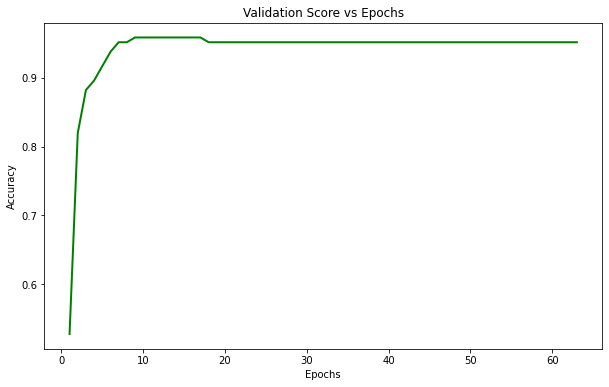

In [15]:
plt.figure(figsize=(10, 6))   
plt.plot(epochs, mlp3.validation_scores_, "g-", alpha=1.0, linewidth=2.0, label="Validation Score")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Score vs Epochs")
plt.show()


    
    c)For training data: accuracy, no. of correct predictions, confusion matrix, precision, recall, f1 score for each class.
    
    d) For test data: accuracy, no. of correct predictions, confusion matrix, precision, recall, f1 score for each class.


In [16]:
print("--------- Train Report ---------")

# Prediction of training set
y_train_predicted = mlp3.predict(X_train)
print("\nTrain Accuracy: {:.2f}".format(mlp3.score(X_train, y_train)))

print("\nTrain - No. of correct predictions: {}/{}".format(accuracy_score(y_train, y_train_predicted, normalize=False), len(y_train)))

print("\nTrain - Confusion Matrix:")
print(confusion_matrix(y_train, y_train_predicted))

print("\nTrain - Classification Report:")
print(classification_report(y_train, y_train_predicted))


########### TEST SET #########################
print("--------- Test Report ---------")
# Prediction of test set
y_test_predicted = mlp3.predict(X_test)
print("\nTest Accuracy: {:.2f}".format(mlp3.score(X_test, y_test)))
      
print("\nTest - No. of correct predictions: {}/{}".format(accuracy_score(y_test, y_test_predicted, normalize=False), len(y_test)))

print("\nTest - Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nTest - Classification Report:")
print(classification_report(y_test, y_test_predicted))

--------- Train Report ---------

Train Accuracy: 0.97

Train - No. of correct predictions: 1398/1437

Train - Confusion Matrix:
[[140   0   0   0   0   0   1   1   0   0]
 [  0 145   0   0   0   0   0   0   0   1]
 [  0   4 136   1   0   0   0   0   1   0]
 [  0   0   1 141   0   1   0   0   1   2]
 [  0   0   0   0 141   0   0   0   3   1]
 [  0   0   0   0   0 142   1   0   0   2]
 [  1   0   0   0   0   0 144   0   0   0]
 [  0   0   0   0   0   0   0 142   0   1]
 [  0   5   0   0   0   1   0   1 132   0]
 [  0   1   0   2   0   2   0   1   3 135]]

Train - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.94      0.99      0.96       146
           2       0.99      0.96      0.97       142
           3       0.98      0.97      0.97       146
           4       1.00      0.97      0.99       145
           5       0.97      0.98      0.98       145
           6       0.99      